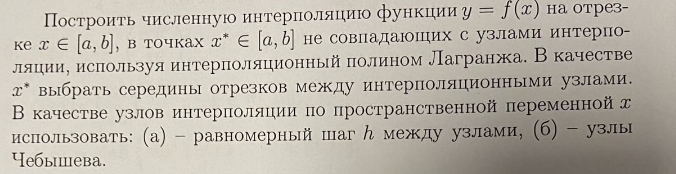

## *Равномерный шаг h между узлами*

In [112]:
from matplotlib import pyplot as plt
import numpy as np
from sympy import lambdify, Symbol

N = 20
a = 0
b = 10
h = (b-a)/(N-1)

x_int = np.arange(a,b+h,h)

def func(x):
    return (10-np.cos(2*x)+np.log(1+x))/(10+x)

y_int = func(x_int)



In [113]:
def lagrange (x, x_int, y_int):
    res = 0
    for i in range(len(x_int)):
        t = y_int[i]
        for j in range(len(x_int)):
            if x_int[j] != x_int[i]:
                t1 = x - x_int[j]
                t2 = x_int[i] - x_int[j]
                t = t * t1 / t2
        res += t
    return res  

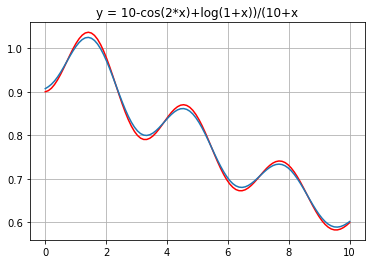

In [177]:
dix_X=[]
dix_Y=[]
for i in range(len(x_int)-1):
  dix_X.append((x_int[i] + x_int[i+1])/2)
  dix_Y.append((y_int[i] + y_int[i+1])/2)

new_x = np.linspace(0, 10, 100) 

new_y = [lagrange(x,dix_X,dix_Y) for x in new_x]
real_y = [func(x) for x in new_x]

plt.grid(True)
plt.title('y = 10-cos(2*x)+log(1+x))/(10+x)')
plt.plot(new_x, real_y,  color='red')
plt.plot(new_x, new_y)
plt.show()

## *Узлы Чебышева*

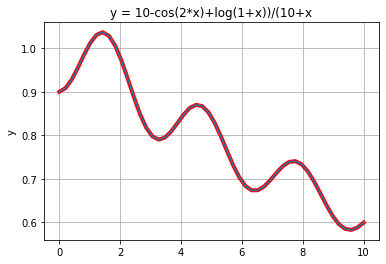

In [176]:
import math
import numpy as np
n = 30
a = 0
b = 10
x_cheb = []
y_cheb = []

def func(x):
  return (10-np.cos(2*x)+np.log(1+x))/(10+x)
  

for i in range (1,n+1):
  x_cheb.append(1/2*(a+b)+1/2*(b-a)*math.cos(((2*i-1)/(2*n))*math.pi))
  y_cheb.append (func(x_cheb[i-1]))

new_x2 = np.linspace(0, 10, 50) 
new_y2 = [lagrange(x,x_cheb,y_cheb) for x in new_x2]
real_y1 = [func(x) for x in new_x2]

plt.grid(True)
plt.title('y = 10-cos(2*x)+log(1+x))/(10+x)')
plt.ylabel("y")
plt.plot(new_x2, real_y1, color='red', linewidth = 4)
plt.plot(new_x2, new_y2)

plt.show()

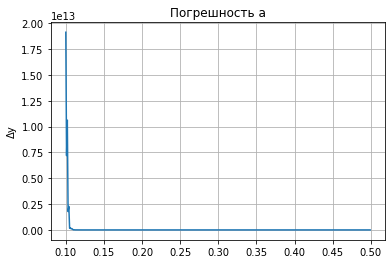

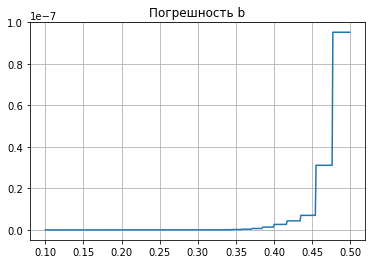

In [186]:
import math
a = 0
b = 10
hlog_array = []
dfr_array_h = []
dfr_array_cheb = []

hmin = 0.1
step = 0.001
hmax = 0.5
hi = np.arange(hmin, hmax, step)

def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(result))]
    return max(dfr)

for h in hi:
   x_cheb = []
   y_cheb = []
   div_x1 = []
   div_y1 = []
   hlog_array.append((h))


   xx = np.linspace(0, 10, 100)
   x_array = np.arange(a,b+h,h)
   y_array = [func(element) for element in x_array]
  
   for i in range(len(x_array)-1):
     div_x1.append((x_array[i] + x_array[i+1])/2)
     div_y1.append((y_array[i] + y_array[i+1])/2)
     

   for i in range(1, len(x_array)+1):
     x_cheb.append(1/2*(a+b)+1/2*(b-a)*math.cos(((2*i-1)/(2*len(x_array)))*math.pi))
     y_cheb.append (func(x_cheb[i-1]))

   new_y1 = [lagrange(x, div_x1, div_y1) for x in xx]
   real_y1 = [func(x) for x in xx]

   new_y_cheb = [lagrange(x,x_cheb,y_cheb) for x in xx]


   dfr_array_h.append((difference(real_y1, new_y1)))
   dfr_array_cheb.append((difference(real_y1, new_y_cheb)))

plt.figure(1)
plt.grid(True)
plt.title("Погрешность a")
plt.ylabel('Δy')
plt.plot (hlog_array,dfr_array_h)

plt.figure(2)
plt.grid(True)
plt.title("Погрешность b")
plt.plot (hlog_array,dfr_array_cheb)
plt.show()
   
